# An Analysis of Global Video Game Sales Trend

## 1. Definition and Purpose
This project analyzes a historical video game sales dataset to uncover key drivers of commercial success. By exploring trends in top-selling genres, platforms, and publishers, the analysis aims to visualize the industry's evolution and identify patterns that have defined the market over the years.

## 2. Importing necessary libraries for the analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Loading the Dataset

#### *Source:* The dataset was acquired from Kaggle.
#### *Description:* The dataset contains over 16,500 records of video games that have sold more than 100,000 copies. The data spans from 1980 to 2020 and includes fields such as Name, Platform, Year_of_Release, Genre, Publisher, and regional sales figures.
#### *Limitations:* A key limitation of this dataset is its focus on physical retail sales. It does not account for the significant rise of digital distribution (e.g., Steam, PlayStation Store) or the mobile gaming market, which has become a dominant force in recent years. Therefore, findings, especially post-2010, should be interpreted with this context in mind.

In [2]:
df = pd.read_csv('vgsales.csv')
print(df.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


## 4. Data Cleaning and Preprocessing
### 4.1 Checking if there is any missing value

In [3]:
print(df.isnull().any())

Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool


#### Since we found that two fields , named 'Year' & 'Publisher' have some missing values so we will drop such records from out dataset.
#### As these fields are essential for temporal and publisher-based analysis and its amount is very little in number compared to the size of dataset

In [4]:
cleaned_data = df.dropna().copy()
print(cleaned_data.isnull().any())

Rank            False
Name            False
Platform        False
Year            False
Genre           False
Publisher       False
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool


### 4.2 Cheking if all the field have correct datatypes

In [5]:
print(cleaned_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB
None


#### Found that Year have been assigned a float datatype, which is not ideal, so we will change it into integer datatype

In [6]:
cleaned_data['Year'] = cleaned_data['Year'].astype(int)
print(cleaned_data['Year'].info())

<class 'pandas.core.series.Series'>
Index: 16291 entries, 0 to 16597
Series name: Year
Non-Null Count  Dtype
--------------  -----
16291 non-null  int32
dtypes: int32(1)
memory usage: 190.9 KB
None


## 5. Exploring the Trends

### 5.1 Top 10 Genres Popular in the Global Market

In [7]:
genres_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
print(f'Genres and their sales in the Global Market from 1980 to 2020 are \n\n {genres_sales}')

Genres and their sales in the Global Market from 1980 to 2020 are 

 Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Misc             809.96
Racing           732.04
Fighting         448.91
Simulation       392.20
Puzzle           244.95
Adventure        239.04
Strategy         175.12
Name: Global_Sales, dtype: float64


#### Visualization

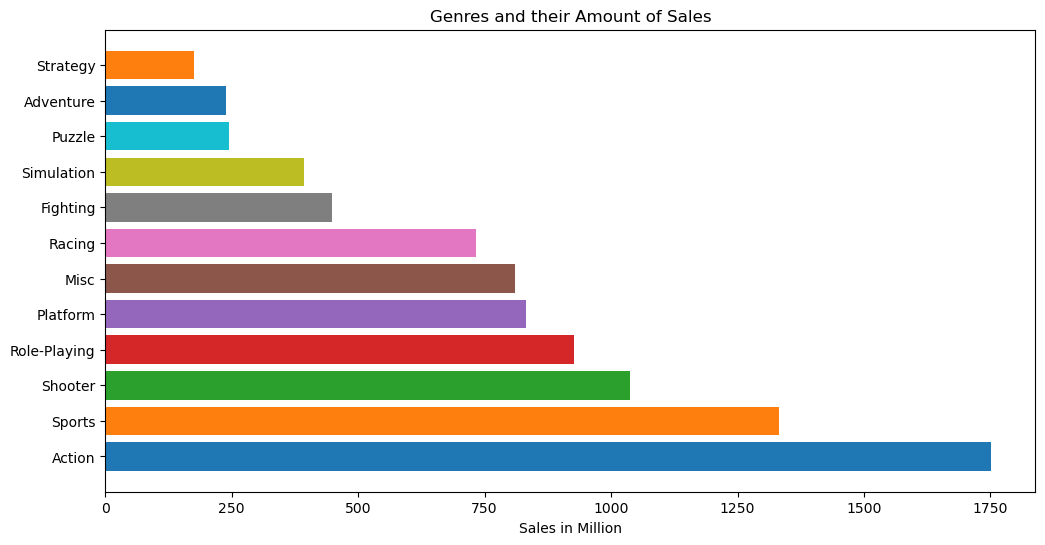

In [8]:
plt.figure(figsize=(12,6))
plt.barh(genres_sales.index, genres_sales.values, color= plt.cm.tab10.colors)
plt.title('Genres and their Amount of Sales')
plt.xlabel('Sales in Million')
plt.show()

### 5.2 Publishers and their Sales

In [9]:
top_publ = cleaned_data.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
print(f'Top 10 Publisher by Sales in the Global Market \n\n {top_publ}')

Top 10 Publisher by Sales in the Global Market 

 Publisher
Nintendo                        1784.43
Electronic Arts                 1093.39
Activision                       721.41
Sony Computer Entertainment      607.28
Ubisoft                          473.54
Take-Two Interactive             399.30
THQ                              340.44
Konami Digital Entertainment     278.56
Sega                             270.70
Namco Bandai Games               253.65
Name: Global_Sales, dtype: float64


#### Visualization

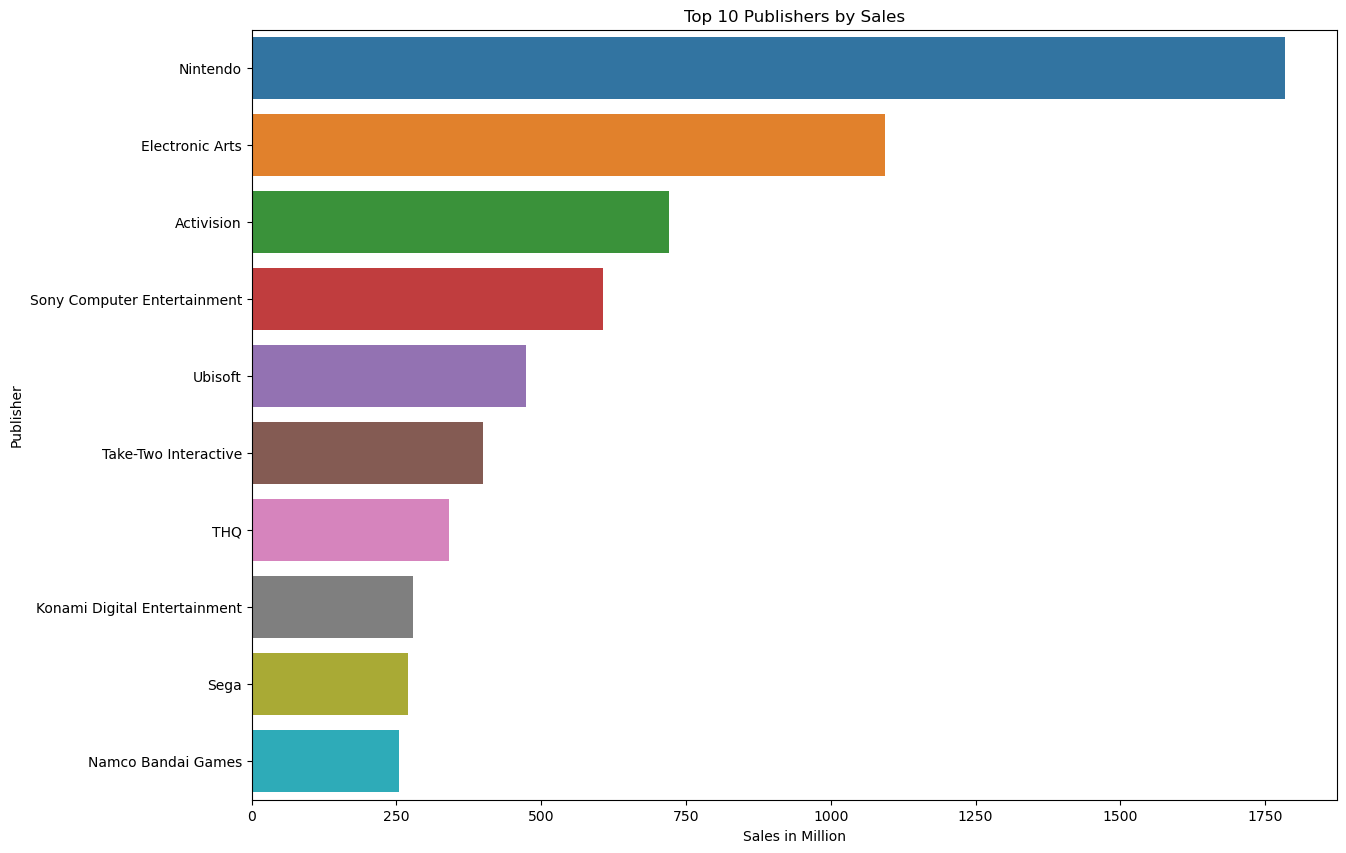

In [10]:
plt.figure(figsize=(14,10))
#plt.barh(top_publ.index[::-1], top_publ.values[::-1], color = plt.cm.tab10.colors) 
""" the values need to be 
reversed so that the most popular publisher can be shown at the top
this is required only in the matplotlib """

sns.barplot(y=top_publ.index, x=top_publ.values, palette="tab10")

plt.title('Top 10 Publishers by Sales')
plt.xlabel('Sales in Million')
plt.show()

### 5.3 Top 10 Gaming Platforms

In [11]:
top_platform = cleaned_data.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)
print(f'Top 10 Poular Gaming Platforms \n\n {top_platform}')

Top 10 Poular Gaming Platforms 

 Platform
PS2     1233.46
X360     969.60
PS3      949.35
Wii      909.81
DS       818.91
PS       727.39
GBA      305.62
PSP      291.71
PS4      278.10
PC       254.70
Name: Global_Sales, dtype: float64


#### Visualization

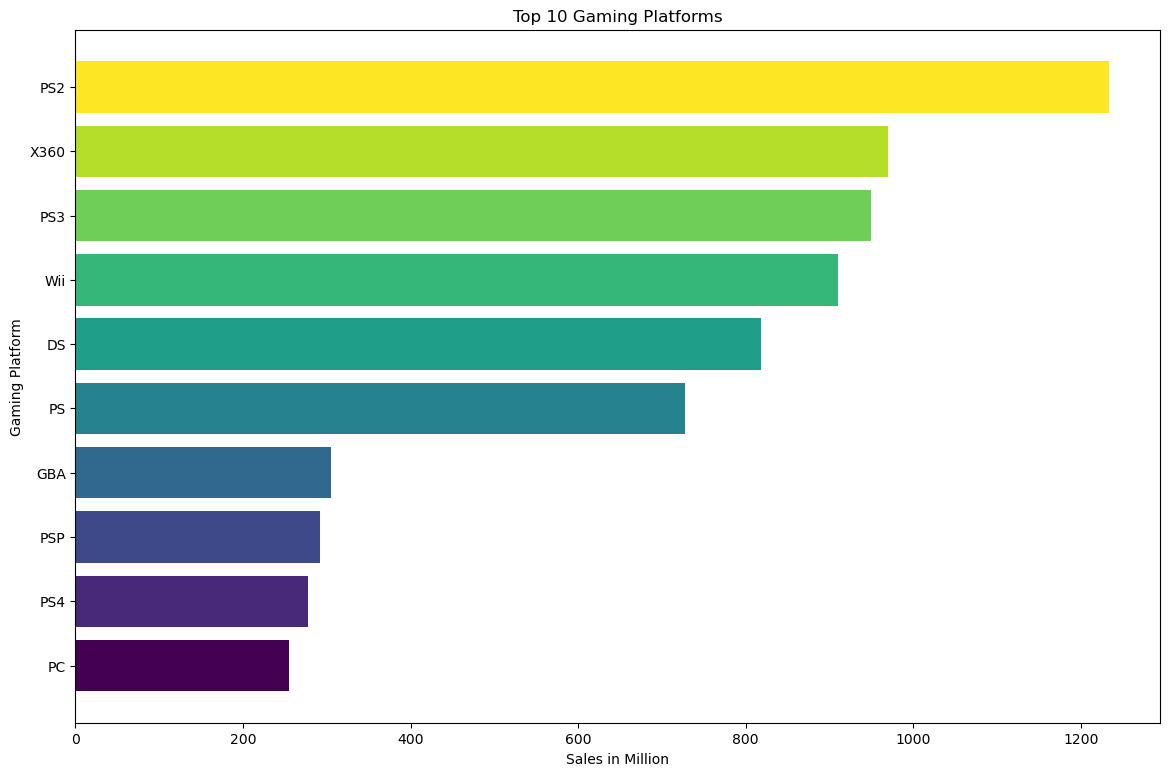

In [12]:
plt.figure(figsize=(14,9))
plt.barh(top_platform.index[::-1], top_platform.values[::-1], color = plt.cm.viridis(np.linspace(0,1,len(top_platform))))
plt.title('Top 10 Gaming Platforms')
plt.ylabel('Gaming Platform')
plt.xlabel('Sales in Million')
plt.show()

### 5.4 Evoulution of Sales over Years

In [13]:
evolution = cleaned_data.groupby('Year')['Global_Sales'].sum()
print(f'Evolution in the amount of Sales over year from Gaming Stores across the Globe \n\n {evolution}')

Evolution in the amount of Sales over year from Gaming Stores across the Globe 

 Year
1980     11.38
1981     35.77
1982     28.86
1983     16.79
1984     50.36
1985     53.94
1986     37.07
1987     21.74
1988     47.22
1989     73.45
1990     49.39
1991     32.23
1992     76.16
1993     45.98
1994     79.17
1995     88.11
1996    199.15
1997    200.98
1998    256.47
1999    251.27
2000    201.56
2001    331.47
2002    395.52
2003    357.85
2004    414.01
2005    458.51
2006    521.04
2007    609.92
2008    678.90
2009    667.30
2010    600.29
2011    515.80
2012    363.49
2013    368.11
2014    337.03
2015    264.44
2016     70.90
2017      0.05
2020      0.29
Name: Global_Sales, dtype: float64


#### Visualization

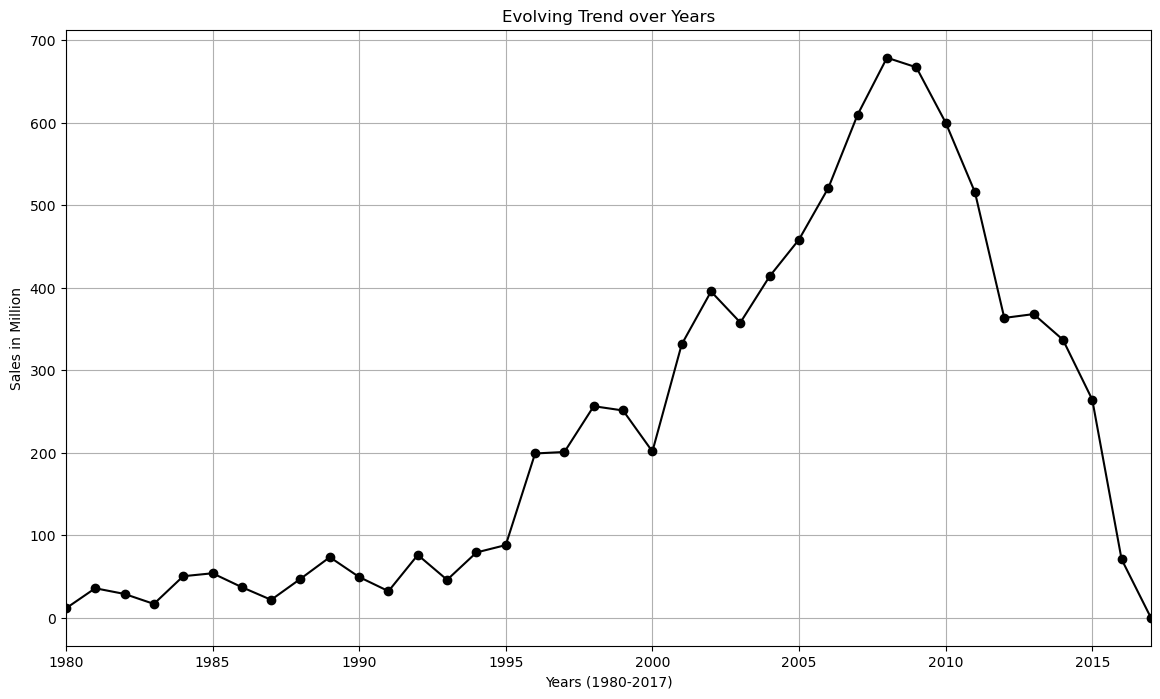

In [15]:
plt.figure(figsize=(14,8))
plt.plot(evolution.index, evolution.values, "k-o")
plt.title('Evolving Trend over Years')
plt.xlabel('Years (1980-2017)')
plt.ylabel('Sales in Million')
plt.grid(True)
plt.xlim(1980, 2017)
plt.show()